In [1]:
%matplotlib inline

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("../")

In [5]:
from src.data_pipeline.DataLoader import DataLoader
from src.utility.sys_utils import get_spark

# import result checking tools
from src.utility.Summary import Summary

In [6]:
spark = get_spark(cores=1) # change cores up to 6 if needed
data_loader = DataLoader(spark, "ml-20m-5p")

Using sampled subset with 6.896900E+04 records
Using split of range (0, 0.2), test set contains 19365 of 68969 records in total.


# Visualization of hyperparameters tuning

In [208]:
summary = Summary(data_loader.get_config().db_path)
summary

## KNN (ml-20m-5p)

In [209]:
sum_5p = summary.summarize_cv("ml-20m-5p")
sum_5p_KNN = sum_5p.loc[sum_5p.model == "KNN"]
sum_5p_KNN_ndcg = sum_5p_KNN.loc[sum_5p_KNN.metric == "ndcg@10"]
sum_5p_KNN_precision = sum_5p_KNN.loc[sum_5p_KNN.metric == "precision@10"]


In [211]:
sum_5p_KNN_precision

,model,hyper,metric,mean,std,rnk
113,KNN,"[('k', 25)]",precision@10,0.004293,0.000451,1.0
107,KNN,"[('k', 10)]",precision@10,0.004293,0.000451,2.0
109,KNN,"[('k', 15)]",precision@10,0.004293,0.000451,3.0
111,KNN,"[('k', 20)]",precision@10,0.004293,0.000451,4.0
115,KNN,"[('k', 30)]",precision@10,0.004293,0.000451,5.0
117,KNN,"[('k', 5)]",precision@10,0.004293,0.000451,6.0


In [212]:
sum_5p_KNN_ndcg['k'] = [30,10,15,25,20,5]
sum_5p_KNN_precision['k'] = [25,10,15,20,30,5]

/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [218]:
sum_5p_KNN_precision

,model,hyper,metric,mean,std,rnk,k
117,KNN,"[('k', 5)]",precision@10,0.004293,0.000451,6.0,5
107,KNN,"[('k', 10)]",precision@10,0.004293,0.000451,2.0,10
109,KNN,"[('k', 15)]",precision@10,0.004293,0.000451,3.0,15
111,KNN,"[('k', 20)]",precision@10,0.004293,0.000451,4.0,20
113,KNN,"[('k', 25)]",precision@10,0.004293,0.000451,1.0,25
115,KNN,"[('k', 30)]",precision@10,0.004293,0.000451,5.0,30


In [215]:
sum_5p_KNN_ndcg = sum_5p_KNN_ndcg.sort_values('k')
sum_5p_KNN_precision = sum_5p_KNN_precision.sort_values('k')

Text(0.5, 1.0, 'Precision (ml-20m-5p)')

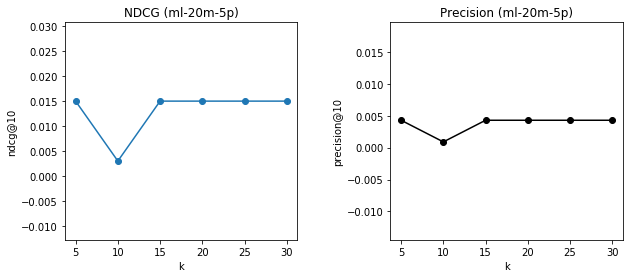

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
plt.subplots_adjust(wspace = 0.4)
ax[0].scatter(sum_5p_KNN_ndcg['k'], sum_5p_KNN_ndcg['mean'])
ax[0].plot(sum_5p_KNN_ndcg['k'], sum_5p_KNN_ndcg['mean'])
ax[0].set_xlabel("k")
ax[0].set_ylabel("ndcg@10")
ax[0].set_title("NDCG (ml-20m-5p)")
ax[1].scatter(sum_5p_KNN_precision['k'], sum_5p_KNN_precision['mean'], color = 'black')
ax[1].plot(sum_5p_KNN_precision['k'], sum_5p_KNN_precision['mean'], color = 'black')
ax[1].set_xlabel("k")
ax[1].set_ylabel("precision@10")
ax[1].set_title("Precision (ml-20m-5p)")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


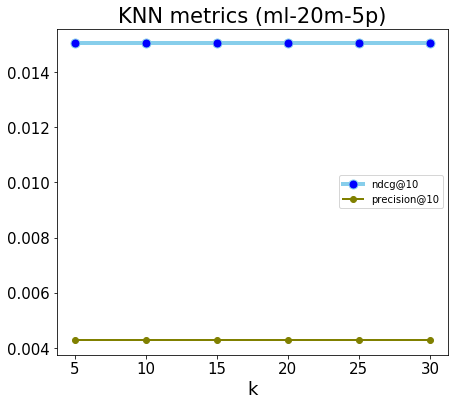

In [239]:
plt.figure (figsize = (7,6))
plt.plot(sum_5p_KNN_ndcg['k'], sum_5p_KNN_ndcg['mean'], marker='o', markerfacecolor='blue', markersize=9,
         color='skyblue', linewidth=4, label = "ndcg@10")
plt.plot(sum_5p_KNN_precision['k'], sum_5p_KNN_precision['mean'], marker='o', color='olive', linewidth=2, label = 'precision@10')
plt.legend()
plt.xlabel("k", fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("KNN metrics (ml-20m-5p)", fontsize = 21)
plt.savefig('knn_5p.eps', format='eps')

## KNN ml-20m-20p

In [219]:
sum_20p = summary.summarize_cv("ml-20m-20p")
sum_20p_KNN = sum_20p.loc[sum_20p.model == "KNN"]
sum_20p_KNN_ndcg = sum_20p_KNN.loc[sum_20p_KNN.metric == "ndcg@10"]
sum_20p_KNN_precision = sum_20p_KNN.loc[sum_20p_KNN.metric == "precision@10"]

In [222]:
sum_20p_KNN_ndcg['k'] = [5,10,15,20,25,30]
sum_20p_KNN_precision['k'] = [5,10,15,20,25,30]

/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


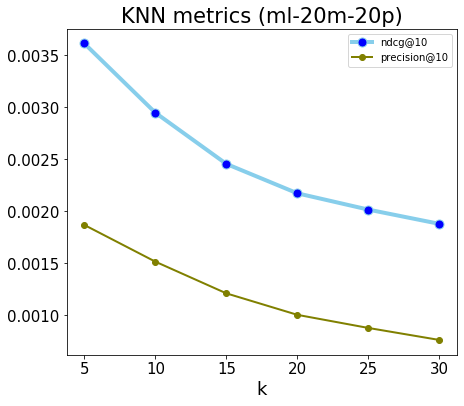

In [237]:
plt.figure (figsize = (7,6))
plt.plot(sum_20p_KNN_ndcg['k'], sum_20p_KNN_ndcg['mean'], marker='o', markerfacecolor='blue', markersize=9,
         color='skyblue', linewidth=4, label = "ndcg@10")
plt.plot(sum_20p_KNN_precision['k'], sum_20p_KNN_precision['mean'], marker='o', color='olive', linewidth=2, label = 'precision@10')
plt.legend()

plt.xlabel("k", fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("KNN metrics (ml-20m-20p)" , fontsize = 21)
plt.savefig('knn_20p.eps', format='eps')

## KNN (ml-20m-10p)

In [226]:
sum_10p = summary.summarize_cv("ml-20m-10p")
sum_10p_KNN = sum_10p.loc[sum_10p.model == "KNN"]
sum_10p_KNN_ndcg = sum_10p_KNN.loc[sum_10p_KNN.metric == "ndcg@10"]
sum_10p_KNN_precision = sum_10p_KNN.loc[sum_10p_KNN.metric == "precision@10"]

In [229]:
sum_10p_KNN_ndcg['k'] = [5,10,15,20,25,30]
sum_10p_KNN_precision['k'] = [5,10,15,20,25,30]

/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [232]:
sum_10p_KNN_ndcg = sum_10p_KNN_ndcg.sort_values('k')
sum_10p_KNN_precision = sum_10p_KNN_precision.sort_values('k')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


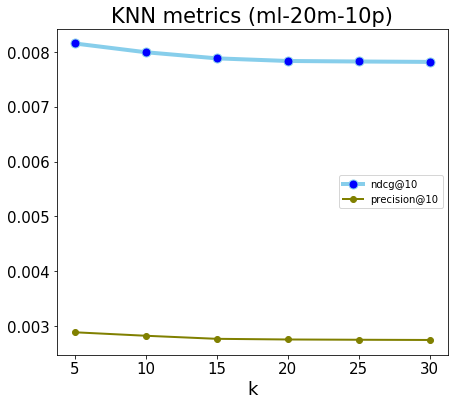

In [238]:
plt.figure (figsize = (7,6))
plt.plot(sum_10p_KNN_ndcg['k'], sum_10p_KNN_ndcg['mean'], marker='o', markerfacecolor='blue', markersize=9,
         color='skyblue', linewidth=4, label = "ndcg@10")
plt.plot(sum_10p_KNN_precision['k'], sum_10p_KNN_precision['mean'], marker='o', color='olive', linewidth=2, label = 'precision@10')
plt.legend()
plt.xlabel("k", fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("KNN metrics (ml-20m-10p)", fontsize =21)
plt.savefig('knn_10p.eps', format='eps')

## ALS (ml-20m-5p)

In [21]:
def get_tidy_df(df):
    df_original = df
    df['hyperlist'] = df.hyper.tolist()
    df = pd.DataFrame(df['hyperlist'].str.split().values.tolist())
    df.rename(columns={3: "num_neg", 5: "rank", 7:"regParam"}, inplace=True)
    df = df.drop(df.columns[[0, 1, 2, 4, 6]], axis=1) 
    
    df['num_neg'] = df['num_neg'].str.extract(r"(\d+)")
    df["num_neg"] = pd.to_numeric(df["num_neg"])

    df['rank'] = df['rank'].str.extract(r"(\d+)")
    df["rank"] = pd.to_numeric(df["rank"])

    df['regParam'] = df['regParam'].str.extract(r"(\d.\d+)")
    df["regParam"]= pd.to_numeric(df["regParam"])
    
    df_mean = pd.DataFrame( df_original['mean'])
    df_mean = df_mean.reset_index(drop=True)
    df_final = pd.concat([df, df_mean], axis=1, ignore_index=True)
    df_final.rename(columns={0: "num_neg", 1: "rank", 2:"regParam", 3:'mean'}, inplace=True)
    return df_final

In [200]:
def get_plot_regParam(df, metric, dataset):
        fig, ax = plt.subplots(1,1, figsize = (7,6))

        ax.plot('regParam', 'mean', 
                 data = df.loc[(df['num_neg'] == 0)
                               &(df['rank'] == 4)].sort_values('regParam'),
                 marker='P', markerfacecolor='grey', markersize=9,
                 color='lightgrey', linewidth=4, label = "rank = 4")

        ax.plot('regParam', 'mean', 
                 data = df.loc[(df['num_neg'] == 0) &(df['rank'] == 8)].sort_values('regParam'),
                 marker='*', markerfacecolor='purple', markersize= 11,
                 color='slateblue', linewidth=4, label = "rank = 8 ")

        ax.plot('regParam', 'mean', 
                 data = df.loc[(df['num_neg'] == 0) &(df['rank'] == 16)].sort_values('regParam'),
                 marker='^', markerfacecolor='blue', markersize=9,
                 color='skyblue', linewidth=4, label = "rank = 16 ")
        ax.plot('regParam', 'mean', 
                 data = df.loc[(df['num_neg'] == 0)&(df['rank'] == 32)].sort_values('regParam'),
                 marker='H', markerfacecolor='green', markersize= 11,
                 color='lightgreen', linewidth=4, label = "rank = 32 ")
        ax.plot('regParam', 'mean', 
                 data = df.loc[(df['num_neg'] == 0)&(df['rank'] == 64)].sort_values('regParam'),
                 marker='o', markerfacecolor='tomato', markersize=9,
                 color='lightpink', linewidth=4, label = "rank = 64 ")


        ax.legend()
        ax.set_xlabel('regParam', fontsize=18)
        ax.set_xscale('log')
        ax.set_xticks([0.005,0.01,0.05,0.1,0.5])
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.set_tick_params(labelsize=12)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #ax.set_ylabel(metric, fontsize=18)
        ax.set_title(metric + " vs regParam(" + dataset + ")", fontsize=22)
        
        


In [201]:
def get_plot_rank(df, metric, dataset):
    fig, ax = plt.subplots(1,1, figsize = (7,6))
    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0)&(df['regParam']== 0.005)].sort_values('rank'),
            marker='P', markerfacecolor='grey', markersize=9,
            color='lightgrey', linewidth=4, label = "regParam = 0.005")
    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0)&(df['regParam'] == 0.01)].sort_values('rank'),
            marker='*', markerfacecolor='purple', markersize= 11,
            color='slateblue', linewidth=4, label = "regParam = 0.01 ")

    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0) &(df['regParam'] == 0.05)].sort_values('rank'),
            marker='^', markerfacecolor='blue', markersize=9,
            color='skyblue', linewidth=4, label = "regParam = 0.05 ")
    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0) &(df['regParam'] == 0.1)].sort_values('rank'),
            marker='H', markerfacecolor='green', markersize= 11,
            color='lightgreen', linewidth=4, label = "regParam = 0.1 ")
    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0) &(df['regParam'] == 0.5)].sort_values('rank'),
            marker='o', markerfacecolor='tomato', markersize=9,
            color='lightpink', linewidth=4, label = "regParam = 0.5")
    ax.legend()
    ax.set_xlabel('rank', fontsize=18)
    ax.set_xticks([4,8,16,32,64])
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=12)
    #ax.set_ylabel(metric, fontsize=18)
    ax.set_title(metric + " vs rank (" + dataset + ")", fontsize=22)        


In [42]:
sum_5p_als = sum_5p.loc[sum_5p.model == "ALS_MF"]
sum_5p_als_ndcg = sum_5p_als.loc[sum_5p_als.metric == "ndcg@10"]
sum_5p_als_precision = sum_5p_als.loc[sum_5p_als.metric == "precision@10"]

In [43]:
sum_5p_als_ndcg = get_tidy_df(sum_5p_als_ndcg)
sum_5p_als_precision = get_tidy_df(sum_5p_als_precision)

/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


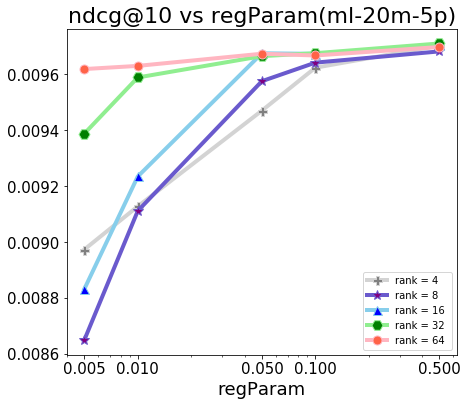

In [160]:
get_plot_regParam(sum_5p_als_ndcg, "ndcg@10", "ml-20m-5p")
plt.savefig('ndcg_regParam_5p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


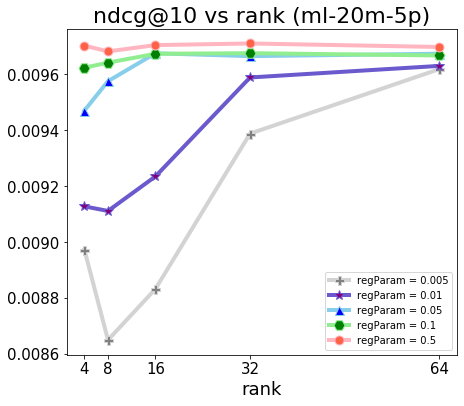

In [161]:
get_plot_rank(sum_5p_als_ndcg, "ndcg@10", "ml-20m-5p")
plt.savefig('ndcgVSrank_5p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


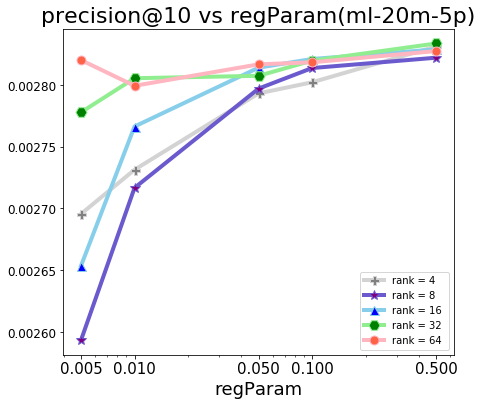

In [202]:
get_plot_regParam(sum_5p_als_precision, "precision@10", "ml-20m-5p")
plt.savefig('precisionVSregParam_5p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


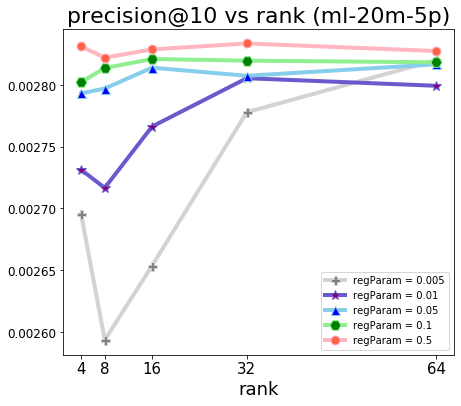

In [203]:
get_plot_rank(sum_5p_als_precision, "precision@10", "ml-20m-5p")
plt.savefig('precisionVSrank_5p.eps', format='eps')

## ALS (ml-20m-20p)

In [60]:
sum_20p_als = sum_20p.loc[sum_20p.model == "ALS_MF"]
sum_20p_als_ndcg = sum_20p_als.loc[sum_20p_als.metric == "ndcg@10"]
sum_20p_als_precision = sum_20p_als.loc[sum_20p_als.metric == "precision@10"]

sum_20p_als_ndcg = get_tidy_df(sum_20p_als_ndcg)
sum_20p_als_precision = get_tidy_df(sum_20p_als_precision)

/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


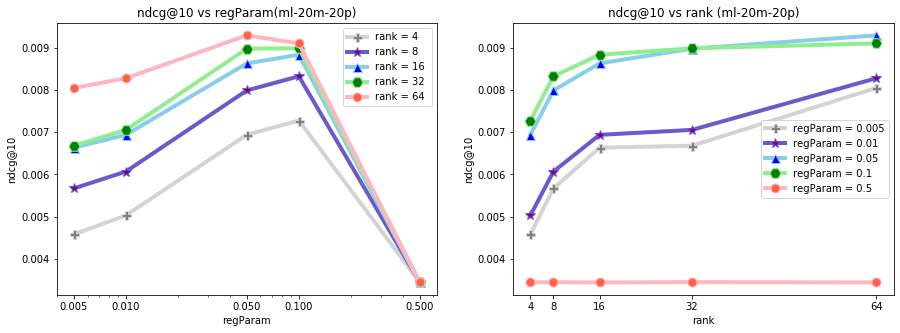

In [78]:
get_plots(sum_20p_als_ndcg, "ndcg@10", "ml-20m-20p")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


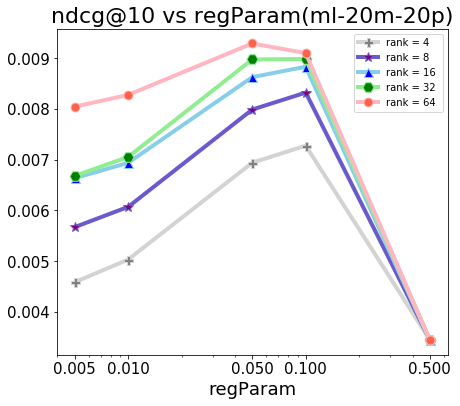

In [164]:
get_plot_regParam(sum_20p_als_ndcg, "ndcg@10", "ml-20m-20p")
plt.savefig('ndcg_regParam_20p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


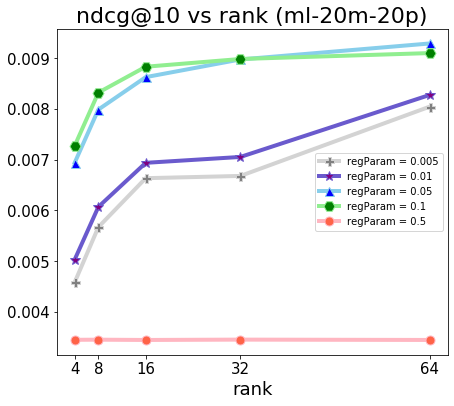

In [199]:
get_plot_rank(sum_20p_als_ndcg, "ndcg@10", "ml-20m-20p")
plt.savefig('ndcgVSrank_20p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


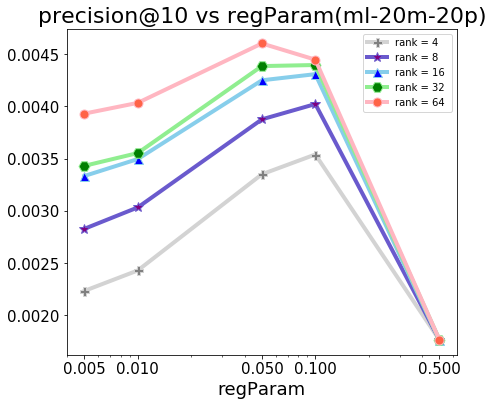

In [166]:
get_plot_regParam(sum_20p_als_precision, "precision@10", "ml-20m-20p")
plt.savefig('precisionVSregParam_20p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


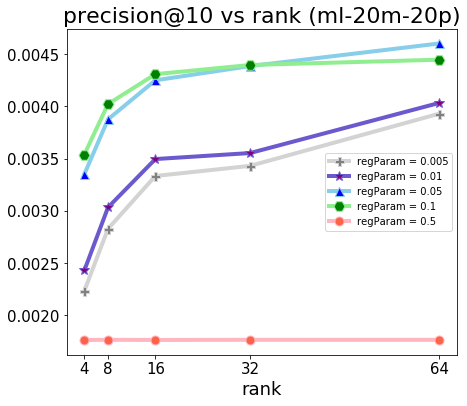

In [167]:
get_plot_rank(sum_20p_als_precision, "precision@10", "ml-20m-20p")
plt.savefig('precisionVSrank_20p.eps', format='eps')

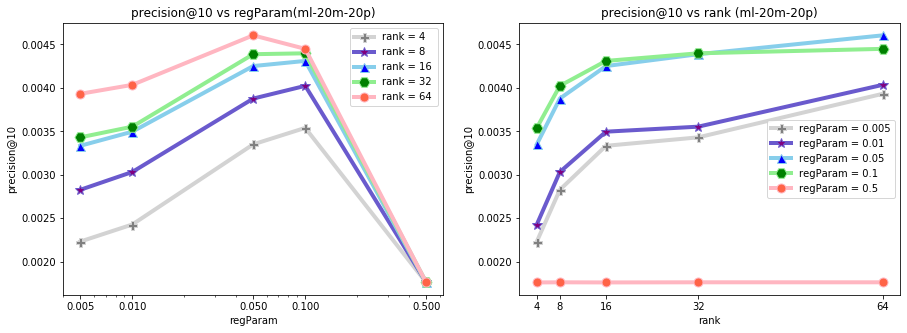

In [79]:
get_plots(sum_20p_als_precision, "precision@10", "ml-20m-20p")

## ALS (ml-20m-10p)

In [63]:
sum_10p_als = sum_10p.loc[sum_10p.model == "ALS_MF"]
sum_10p_als_ndcg = sum_10p_als.loc[sum_10p_als.metric == "ndcg@10"]
sum_10p_als_precision = sum_10p_als.loc[sum_10p_als.metric == "precision@10"]

sum_10p_als_ndcg = get_tidy_df(sum_10p_als_ndcg)
sum_10p_als_precision = get_tidy_df(sum_10p_als_precision)

/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


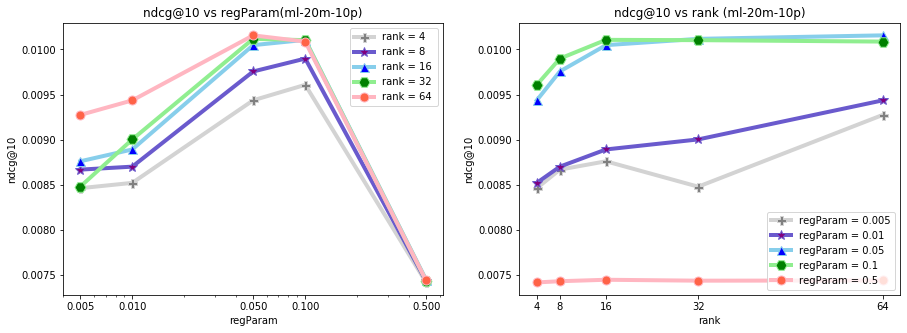

In [80]:
get_plots(sum_10p_als_ndcg, "ndcg@10", "ml-20m-10p")

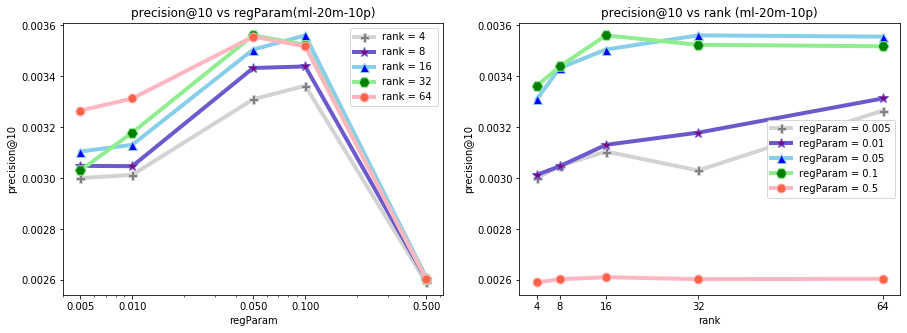

In [81]:
get_plots(sum_10p_als_precision, "precision@10", "ml-20m-10p")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


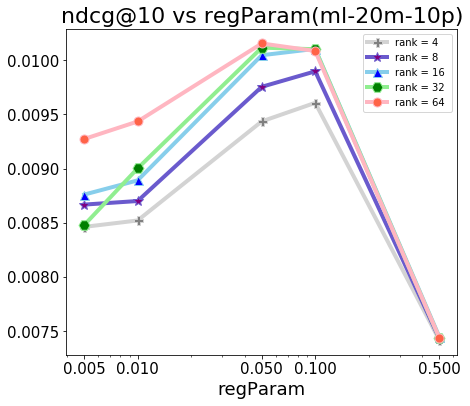

In [168]:
get_plot_regParam(sum_10p_als_ndcg, "ndcg@10", "ml-20m-10p")
plt.savefig('ndcg_regParam_10p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


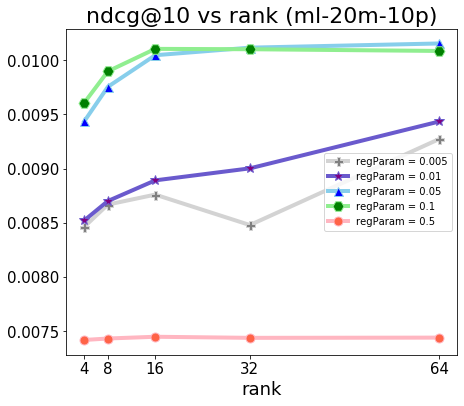

In [198]:
get_plot_rank(sum_10p_als_ndcg, "ndcg@10", "ml-20m-10p")
plt.savefig('ndcgVSrank_10p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


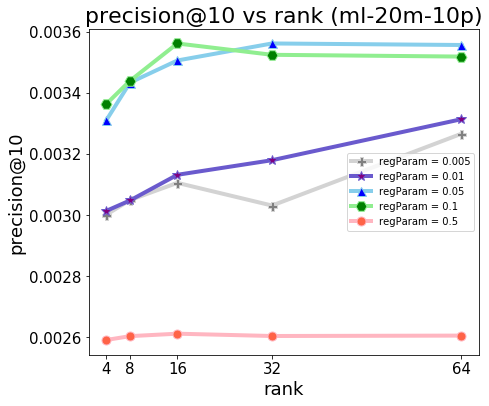

In [145]:
get_plot_rank(sum_10p_als_precision, "precision@10", "ml-20m-10p")
plt.savefig('precisionVSrank_10p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


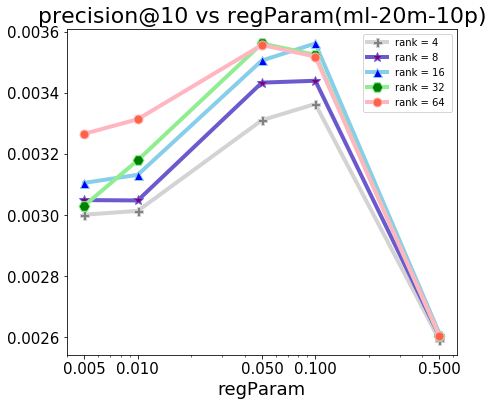

In [170]:
get_plot_regParam(sum_10p_als_precision, "precision@10", "ml-20m-10p")
plt.savefig('precisionVSregParam_10p.eps', format='eps')

In [193]:
#This is for adjusting legend location

def get_plot_rank2(df, metric, dataset):
    fig, ax = plt.subplots(1,1, figsize = (7,6))
    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0)&(df['regParam']== 0.005)].sort_values('rank'),
            marker='P', markerfacecolor='grey', markersize=9,
            color='lightgrey', linewidth=4, label = "regParam = 0.005")
    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0)&(df['regParam'] == 0.01)].sort_values('rank'),
            marker='*', markerfacecolor='purple', markersize= 11,
            color='slateblue', linewidth=4, label = "regParam = 0.01 ")

    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0) &(df['regParam'] == 0.05)].sort_values('rank'),
            marker='^', markerfacecolor='blue', markersize=9,
            color='skyblue', linewidth=4, label = "regParam = 0.05 ")
    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0) &(df['regParam'] == 0.1)].sort_values('rank'),
            marker='H', markerfacecolor='green', markersize= 11,
            color='lightgreen', linewidth=4, label = "regParam = 0.1 ")
    ax.plot('rank', 'mean', 
            data = df.loc[(df['num_neg'] == 0) &(df['regParam'] == 0.5)].sort_values('rank'),
            marker='o', markerfacecolor='tomato', markersize=9,
            color='lightpink', linewidth=4, label = "regParam = 0.5")
    ax.legend(bbox_to_anchor=(0.6,0.2),bbox_transform=plt.gcf().transFigure)
    ax.set_xlabel('rank', fontsize=18)
    ax.set_xticks([4,8,16,32,64])
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    #ax.set_ylabel(metric, fontsize=18)
    ax.set_title(metric + " vs rank (" + dataset + ")", fontsize=22)        


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


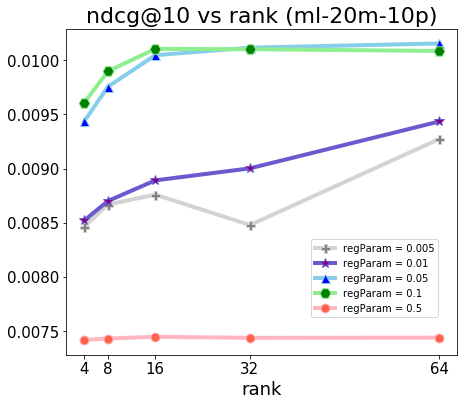

In [207]:
get_plot_rank2(sum_10p_als_ndcg, "ndcg@10", "ml-20m-10p")
plt.savefig('ndcgVSrank_10p.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


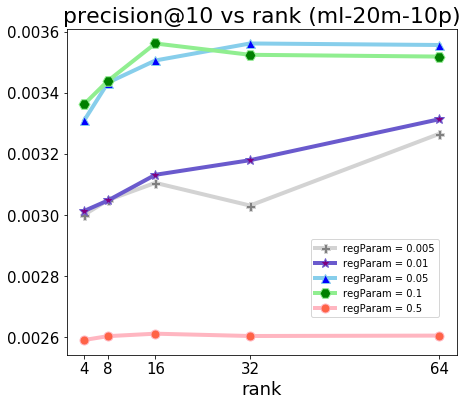

In [205]:
get_plot_rank2(sum_10p_als_precision, "precision@10", "ml-20m-10p")
plt.savefig('precisionVSrank_10p.eps', format='eps')